In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import seaborn as sns
import sklearn

## Data Cleaning And Exploratory Data Analysis

In [3]:
nyc = pd.read_csv('AB_NYC_2019.csv')

In [4]:
nyc.drop(['id','host_id'],axis = 1, inplace=True)

In [5]:
nyc.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [7]:
nyc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
nyc['neighbourhood'].nunique()

221

In [9]:
nyc.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

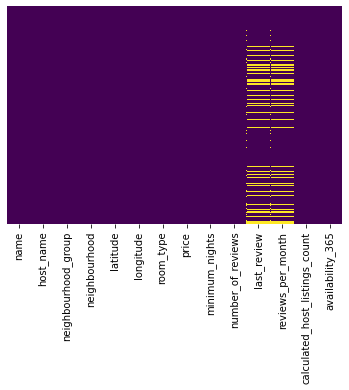

In [6]:
sns.heatmap(nyc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- due to the high number of NULL or NaN values in these columns, the columns will be deemed as non significant to our model.

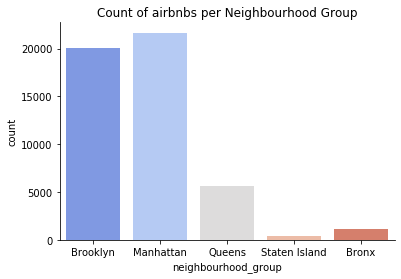

In [12]:
sns.countplot(x='neighbourhood_group',data=nyc,palette='coolwarm').set_title('Count of airbnbs per Neighbourhood Group')
sns.despine()

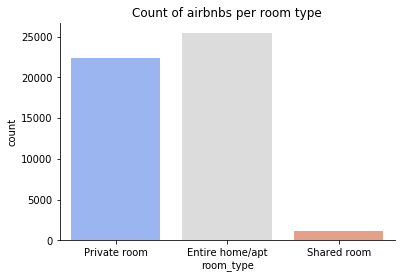

In [148]:
sns.countplot(x='room_type',data=nyc,palette='coolwarm').set_title('Count of airbnbs per room type')
sns.despine()

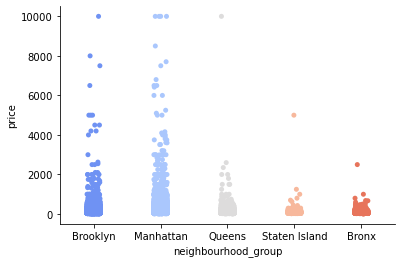

In [14]:
sns.stripplot(x='neighbourhood_group',y='price',data = nyc, palette='coolwarm')
sns.despine()

- from this stripplot it seems as if there are some airbnbs priced at 0 dollars, we will explore this.

In [15]:
nyc[nyc['price'] < 10]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,Modern apartment in the heart of Williamsburg,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,the best you can find,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


- there are 11 entries listed as 0 dollars, which seem unreasonable and maybe an error. In order to account for this, these values will be set to the mean of each neighbourhood group. See below

In [6]:
print('Avg price for Brooklyn',nyc['price'][nyc['neighbourhood_group']=='Brooklyn'].mean().round())
print('Avg price for Bronx',nyc['price'][nyc['neighbourhood_group']=='Bronx'].mean().round())
print('Avg price for Manhattan',nyc['price'][nyc['neighbourhood_group']=='Manhattan'].mean().round())

Avg price for Brooklyn 124.0
Avg price for Bronx 87.0
Avg price for Manhattan 197.0


In [7]:
nyc.iloc[23161,7]=124
nyc.iloc[25433,7]=87
nyc.iloc[25634,7]=124
nyc.iloc[25753,7]=124
nyc.iloc[25778,7]=124
nyc.iloc[25794,7]=124
nyc.iloc[25795,7]=124
nyc.iloc[25796,7]=124
nyc.iloc[26259,7]=197
nyc.iloc[26841,7]=124
nyc.iloc[26866,7]=124

In [255]:
nyc[(nyc['neighbourhood_group'] == 'Staten Island') & (nyc['price'] > 700)]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6333,Victorian with Stunning Views of NYC Harbor,William,Staten Island,St. George,40.64571,-74.07835,Entire home/apt,1000,1,0,NaN,NaN,1,364
22353,Victorian Film location,Alissa,Staten Island,Randall Manor,40.63952,-74.09730,Entire home/apt,5000,1,0,NaN,NaN,1,344
25386,Beach House Retreat. 15 minutes from Manhattan.,Mark,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,NaN,NaN,3,365
45572,Central Hall Colonial with Free Parking Bus EX...,Anastasios,Staten Island,Prince's Bay,40.53076,-74.20295,Entire home/apt,1250,14,0,NaN,NaN,1,23


#### We will exclude the outliers of costs of airbnb from greater than 700 dollars.
- This range was chosen as it would include most of the airbnbs across all neighbourhood groups and an attempt to minimize most outliers. Thus, the threshold for price for this analysis was cut off at $700.

In [215]:
nyc[nyc['price']>700].count()

name                              589
host_name                         589
neighbourhood_group               589
neighbourhood                     589
latitude                          589
longitude                         589
room_type                         589
price                             589
minimum_nights                    589
number_of_reviews                 589
last_review                       315
reviews_per_month                 315
calculated_host_listings_count    589
availability_365                  589
dtype: int64

In [9]:
nyc_df = nyc[nyc['price']<700]

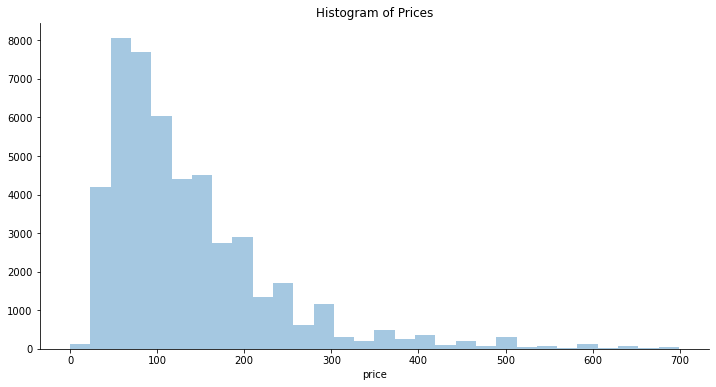

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(nyc_df['price'], kde = False, bins = 30).set_title('Histogram of Prices')
sns.despine()

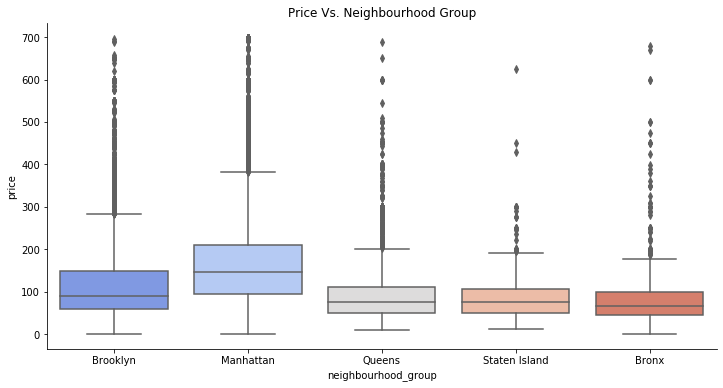

In [256]:
plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_group',y='price',data=nyc_df,palette='coolwarm').set_title('Price Vs. Neighbourhood Group')
sns.despine()

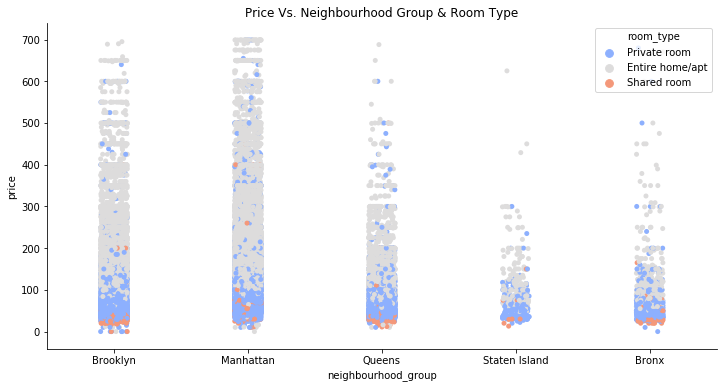

In [258]:
plt.figure(figsize=(12,6))
sns.stripplot(x='neighbourhood_group',y='price',data=nyc_df,hue='room_type',palette='coolwarm').set_title('Price Vs. Neighbourhood Group & Room Type')
sns.despine()

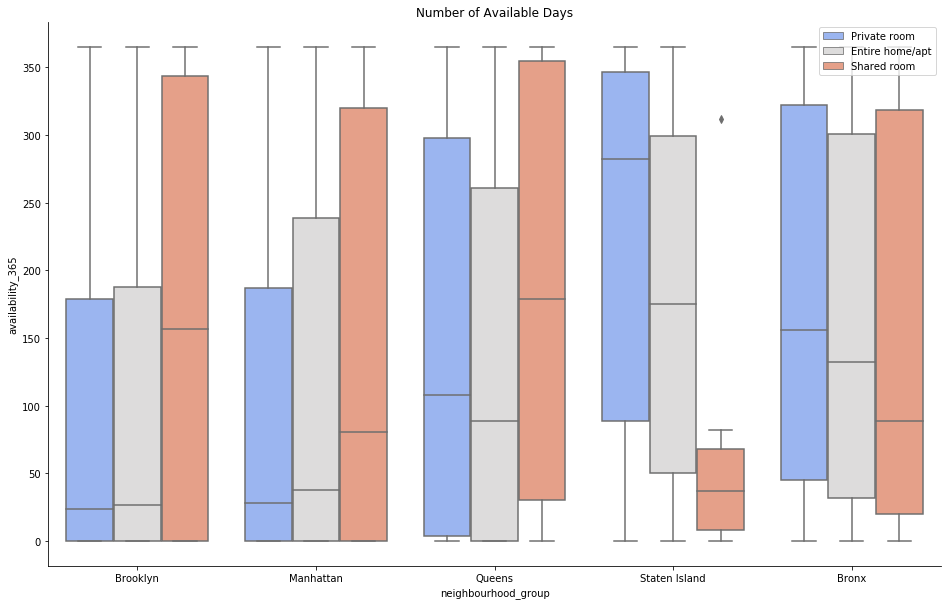

In [220]:
plt.figure(figsize=(16,10))
sns.boxplot(x='neighbourhood_group',y='availability_365',data=nyc_df,palette='coolwarm',hue = 'room_type').set_title('Number of Available Days')
sns.despine()
plt.legend(loc='upper right')

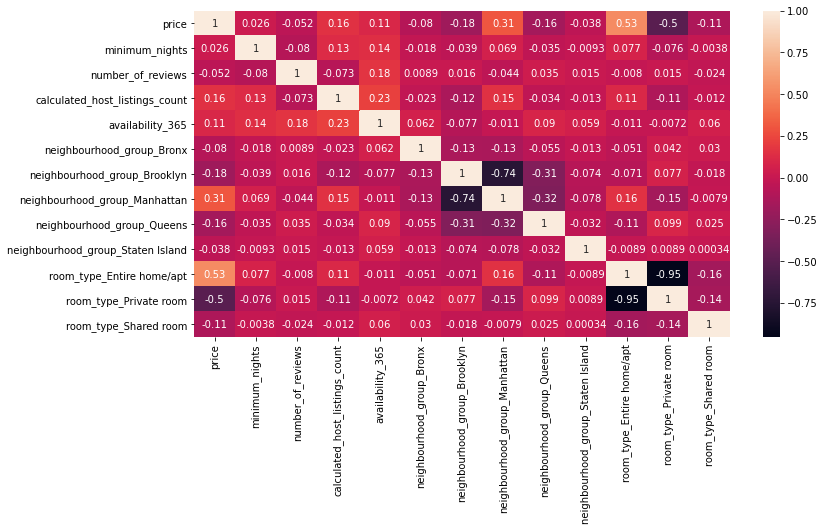

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df_dum.corr(), annot= True)

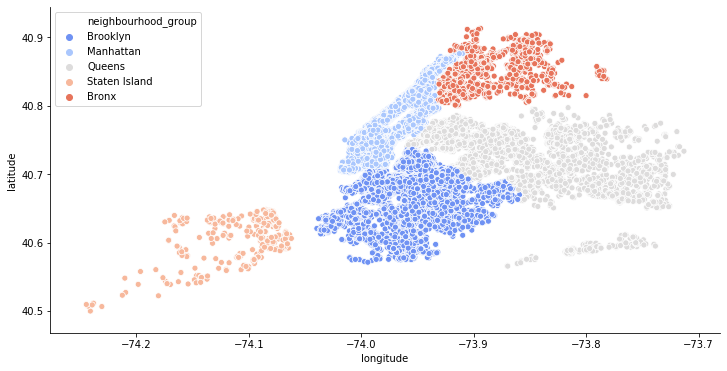

In [170]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude',data=nyc_df,hue='neighbourhood_group',palette='coolwarm')
sns.despine()

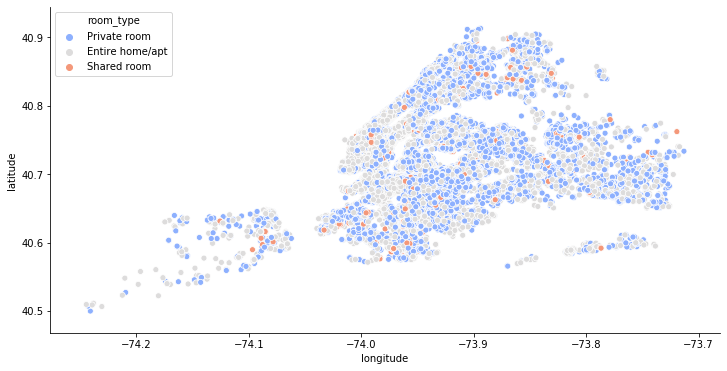

In [171]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude',data=nyc_df,hue='room_type',palette='coolwarm')
sns.despine()

## Model Building Multiple Linear Regression

In [10]:
df_model = nyc_df[['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

In [11]:
df_dum = pd.get_dummies(df_model)

In [12]:
df_dum.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,0,1,0,0,0,0,1,0
1,225,1,45,2,355,0,0,1,0,0,1,0,0
2,150,3,0,1,365,0,0,1,0,0,0,1,0
3,89,1,270,1,194,0,1,0,0,0,1,0,0
4,80,10,9,1,0,0,0,1,0,0,1,0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [47]:
X = df_dum.drop('price',axis=1)
y = df_dum['price'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
lm = LinearRegression()

In [18]:
cross_val_score(lm, X_train,y_train, cv=5,scoring='neg_mean_absolute_error').mean()

-50.644891530106946

In [51]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Y_test Vs. Predictions')

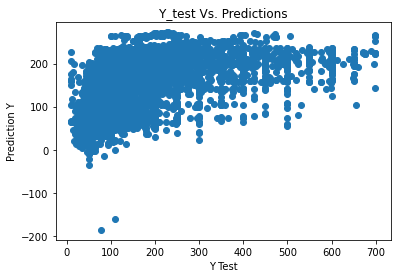

In [56]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Prediction Y')
plt.title('Y_test Vs. Predictions')

#### Histogram of Residuals

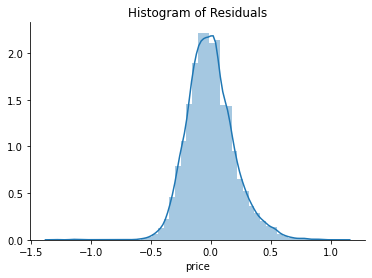

In [45]:
sns.distplot((y_test-predictions),bins = 50).set_title('Histogram of Residuals')
sns.despine()

#### Model Evaluation

In [73]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': np.round(predictions.flatten())})
error.head(10)

,Actual Values,Predicted Values
0,70,65.0
1,434,199.0
2,245,185.0
3,295,196.0
4,268,159.0
5,98,165.0
6,150,200.0
7,100,199.0
8,180,200.0
9,80,63.0


- On average we have a MAE of around 50. Using a cross validation, we were able to get an MAE of 50.6. As a result, this MAE error tells us that our model has a mean error of around $50.

In [54]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
minimum_nights,-0.274472
number_of_reviews,-0.142831
calculated_host_listings_count,0.114444
availability_365,0.100845
neighbourhood_group_Bronx,-18.548785
neighbourhood_group_Brooklyn,6.009997
neighbourhood_group_Manhattan,45.855703
neighbourhood_group_Queens,-9.413703
neighbourhood_group_Staten Island,-23.903213
room_type_Entire home/apt,72.787521


- these values makes sense, as it would be more expensive to rent an airbnb in Manhattan rather than the other neighbourhood groups. 
- In addition, renting an entire home would also be more expensive rather than renting a private room or a shared room.

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfr = RandomForestRegressor()

In [57]:
cross_val_score(rfr,X_train,y_train,cv=5, scoring='neg_mean_absolute_error').mean()

-49.815970700360666

In [58]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
pred = rfr.predict(X_test)

In [80]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': np.round(pred.flatten())})
error.head(10)

,Actual Values,Predicted Values
0,70,73.0
1,434,189.0
2,245,244.0
3,295,163.0
4,268,209.0
5,98,112.0
6,150,157.0
7,100,178.0
8,180,182.0
9,80,71.0


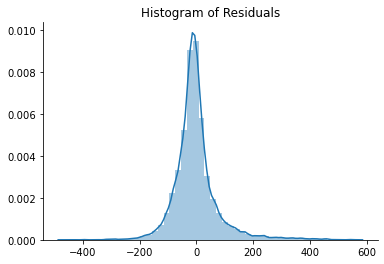

In [81]:
sns.distplot((y_test-pred),bins = 50).set_title('Histogram of Residuals')
sns.despine()

Text(0.5, 1.0, 'Y_test Vs. Predictions')

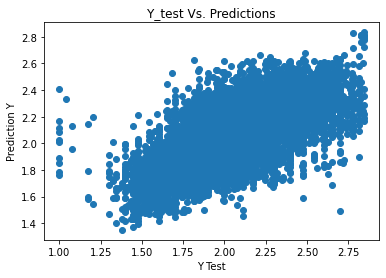

In [49]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Prediction Y')
plt.title('Y_test Vs. Predictions')

## Model Comparison

In [ ]:
from sklearn import metrics

In [79]:
print('MULTIPLE LINEAR REGRESSION')
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 Score: ',metrics.r2_score(y_test, predictions))
print('\nRANDOM FOREST REGRESSOR')
print('MAE: ', metrics.mean_absolute_error(y_test,pred))
print('MSE: ', metrics.mean_squared_error(y_test,pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score: ',metrics.r2_score(y_test, pred))

MULTIPLE LINEAR REGRESSION
MAE:  51.571749061241
MSE:  6283.473367630785
RMSE:  79.26836296802644
R2 Score:  0.3603071387380955

RANDOM FOREST REGRESSOR
MAE:  51.11397625413213
MSE:  6277.330734507454
RMSE:  79.22960768871353
R2 Score:  0.3609324932718775


## Conclusion

The results show that all models have similar prediction results.

- The MAE value indicates the mean absolute error values for each model, which is presented at around 51. This number indicates our model's prediction to be within around 51 dollars.
- RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.
- R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. The above results show that, around 36% of the data fit the regression model.